<a href="https://colab.research.google.com/github/vinodnbhat/AIML-CEP-2021-Assignments/blob/main/Linear%20regression_Tissue%20drug%20conc%20vs%20Math%20score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
drug_vs_mathscore_data = pd.read_csv('http://users.stat.ufl.edu/~winner/data/lsd.dat', delim_whitespace = True, index_col = False, header = None)
drug_vs_mathscore_data.head()

,0,1
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [36]:
drug_vs_mathscore_data

,0,1
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


In [37]:
import urllib.request
drug_vs_mathscore_data_description_file = urllib.request.urlopen('http://users.stat.ufl.edu/~winner/data/lsd.txt')

for line in drug_vs_mathscore_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line)

Dataset:  lsd.dat

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance

Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in

Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.



Description: Group of volunteers was given LSD, their mean scores on

math exam and tissue concentrations of LSD were obtained at n=7 time points.



Variables/Columns



Tissue Concentration    1-4

Math Score             8-12



Inserting column descriptions

In [38]:
drug_vs_mathscore_data.columns= ['Tissue concentration', 'Math score']
drug_vs_mathscore_data

,Tissue concentration,Math score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


<function matplotlib.pyplot.show>

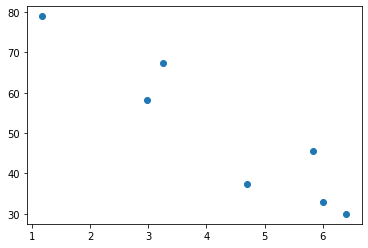

In [44]:
plt.scatter(drug_vs_mathscore_data['Tissue concentration'], drug_vs_mathscore_data['Math score'])
#plt.title('Tissue concentration vs Math score')
#plt.xlabel('Tissue drug concentration')
#plt.ylabel('Math score')
plt.show

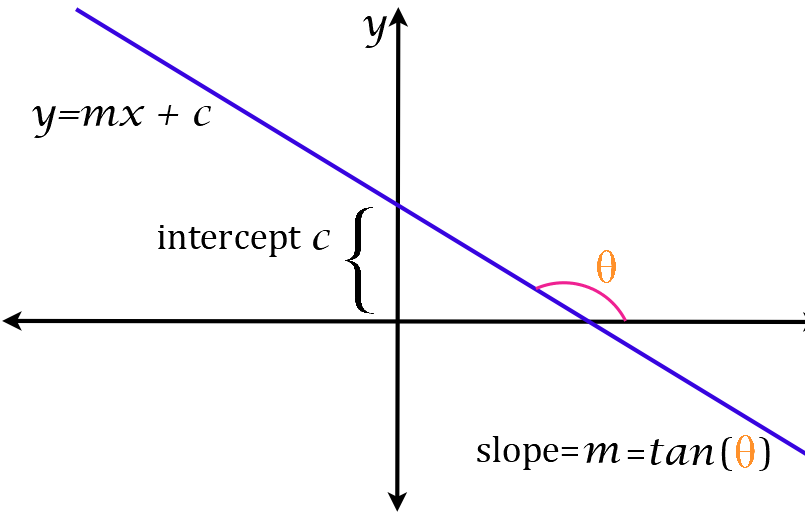

In [12]:
img_2 = Image.open(urlopen('https://github.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/raw/main/images/line_pic_neg_slope.png'))
img_2

In [14]:
n = len(drug_vs_mathscore_data.index)
print('number of datapoints in dataset:', n)

number of datapoints in dataset: 7


In [16]:
x_bar = 0
y_bar = 0

for i in range(n):
  x_bar += float(drug_vs_mathscore_data.iat[i,0])
  y_bar += float(drug_vs_mathscore_data.iat[i,1])

x_bar /= n
y_bar /= n

print('x_bar:', x_bar, 'y_bar:', y_bar)

x_bar: 4.332857142857143 y_bar: 50.08714285714286


In [21]:
sigma_xx = 0
sigma_xy = 0

for i in range(n):
  sigma_xx += (float(drug_vs_mathscore_data.iat[i,0]) - x_bar) ** 2
  sigma_xy += (float(drug_vs_mathscore_data.iat[i,0] - x_bar)) * (float(drug_vs_mathscore_data.iat[i,1] - y_bar))

print('sigma_xx:', sigma_xx, 'sigma_xy:', sigma_xy)

sigma_xx: 22.474942857142857 sigma_xy: -202.48724285714292


In [22]:
beta_1 = sigma_xy/sigma_xx
beta_0 = y_bar - beta_1 * x_bar

print('beta_0:', beta_0, 'beta_1', beta_1)

beta_0: 89.12387376799306 beta_1 -9.009466415296783


In [23]:
x_min = 9999
x_max = -9999

for i in range(n):
  x_i = float(drug_vs_mathscore_data.iat[i, 0])
  if x_i > x_max:
    x_max = x_i
  if x_i < x_min:
    x_min = x_i

x_min = x_min - 1
x_max = x_max + 1

print('x_min:', x_min, 'x_max:', x_max)

x_min: 0.16999999999999993 x_max: 7.41


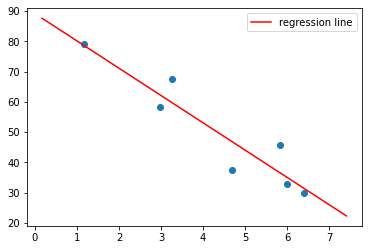

In [43]:
x = np.linspace(x_min, x_max, 100)
y = beta_1 * x + beta_0

plt.plot(x, y, '-r', label = 'regression line')

plt.scatter(drug_vs_mathscore_data['Tissue concentration'], drug_vs_mathscore_data['Math score'])
#plt.title("Tissue drug concentration vs Math scores Regression")
#plt.xlabel("Tissue concentration")
#plt.ylabel("Math scores")
plt.legend(loc='upper right')
plt.show()

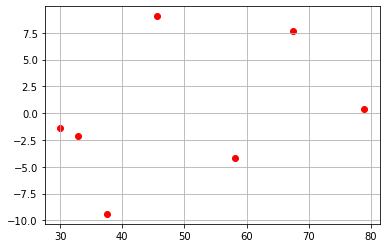

In [30]:
e_i_residuals_list = []

for i in range(n):
  x_i = float(drug_vs_mathscore_data.iat[i,0])
  y_i = float(drug_vs_mathscore_data.iat[i,1])
  y_pred_i = beta_1 * x_i + beta_0
  e_i = y_i - y_pred_i
  e_i_residuals_list.append(e_i)

plt.scatter(drug_vs_mathscore_data['Math score'], e_i_residuals_list, color = 'r')
#plt.title("Residual plot")
#plt.xlabel("Math score responses")
#plt.ylabel("Residuals")
plt.grid()
plt.show()

In [45]:
sigma_yy = 0

for i in range(n):
  sigma_yy += (float(drug_vs_mathscore_data.iat[i, 1]- y_bar)) ** 2

print('sigma_yy:', sigma_yy)

sample_correlation = sigma_xy / np.sqrt(sigma_xx * sigma_yy)
print('sample correlation:', sample_correlation)

sigma_yy: 2078.183342857143
sample correlation: -0.9369284768740831


In [49]:
sum_sq_residuals = 0

for i in range(n):
  sum_sq_residuals += e_i ** 2

print('sum of squared residuals:', sum_sq_residuals)

R2 = 1 - sum_sq_residuals/sigma_yy
print('R^2:', R2)

sum of squared residuals: 13.782674713943624
R^2: 0.9933679216699933
